Koch snowflake fractal generator

The Code: Snowflake_gen

In [101]:
# Koch snowflake fractal generator
# Author: Ben Moore
# A command line app to generate Koch snowflake fractals.
# Email: bdm22@case.edu
# Python Version: 3.4.3


import click
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from ipywidgets import interact, interactive
import ipywidgets as widgets

def shape_setup():
    """Create a base triangle to test the Koch snowflake algorithm.

    Returns:
        list: List of points representing a triangle.
    """
    width = 200
    lines = list()

    # Create points a, b, and c for corners of triangle
    a = np.array([0, 173])
    b = np.array([width, 173])
    c = np.array([width/2, 173+width*math.cos(math.radians(30))])

    # Append lines connecting three points to list
    lines.append(KochLine(a, b))
    lines.append(KochLine(b, c))
    lines.append(KochLine(c, a))

    return lines


def gen_snowflake(start_shape, steps_depth):
    """Run the Koch snowflake algorithm multiple times.

    Args:
        start_shape (list): List of base line segments to run Koch algorithm on.
        steps_depth (int): Number of times to run the algorithm.

    Returns:
        list: List of points representing line segments in the modified shape.
    """
    for i in range(0, steps_depth):
        # Run algorithm one step
        new_shape = generate_one_step(start_shape)
        # Result is made the next input
        start_shape = new_shape

    return start_shape


def generate_one_step(line_list):
    """Run the Koch snowflake algorithm once on the input list of points.

    Args:
        line_list (list): List to run algorithm on.

    Returns:
        list: A list containing the divided KochLines.
    """
    next_list = list()
    for l in line_list:
        # Create fractal segment by dividing and rotating line segment at five points
        a = l.koch_a()
        b = l.koch_b()
        c = l.koch_c()
        d = l.koch_d()
        e = l.koch_e()

        # Append generated line segments
        next_list.append(KochLine(a, b))
        next_list.append(KochLine(b, c))
        next_list.append(KochLine(c, d))
        next_list.append(KochLine(d, e))

    return next_list


class KochLine(object):
    """Class for line segments in the Koch snowflake."""
    def __init__(self, a, b):
        self.start = a
        self.end = b

    def __str__(self):
        x, y = self.start
        u, v = self.end
        return '(({}, {}), ({}, {}))'.format(x, y, u, v)

    def koch_a(self):
        """Return point A of a divided Koch line."""
        # The start point of our original segment
        return self.start

    def koch_b(self):
        """Return point B of a divided Koch line."""
        v = self.end - self.start
        # Scale by 1/3
        v = np.divide(v, 3)
        # Add scaled vector to start point
        v += self.start
        return v

    def koch_c(self):
        """Return point C of a divided Koch line."""
        a = np.array(self.start, dtype=np.float)
        v = np.array(self.end - self.start, dtype=np.float)
        # Scale vector by 1/3
        v = np.divide(v, 3)
        # Add scaled vector to original point
        a += v
        # Rotate by 60 degrees
        b = rotation_2d(v, -math.radians(60))
        # Add rotated vector to starting point
        c = a + b
        return c

    def koch_d(self):
        """Return point D of a divided Koch line."""
        v = np.array(self.end - self.start, dtype=np.float)
        # Scale vector by 2/3
        v *= (2/3.0)
        # Add scaled vector to start point
        v += self.start
        return v

    def koch_e(self):
        """Return point E of a divided Koch line."""
        # The end point of our original segment
        return self.end


def rotation_2d(v, angle):
    """
    Rotate a 2D vector by an angle.

    Args:
        v (tuple): Vector to rotate.
        angle (float): Angle to rotate the vector by in radians.

    Returns:
        list: A list containing the calculated vector magnitudes.
    """
    x, y = v

    cos_theta = math.cos(angle)
    sin_theta = math.sin(angle)

    # Trig calculation to find new x and y vector components
    nx = x*cos_theta - y*sin_theta
    ny = x*sin_theta + y*cos_theta

    return [nx, ny]


def print_helper(koch_list):
    """
    Print a list of points in an organized manner.

    Args:
        koch_list (list): List of line segments to print.
    """
    # Join tuples converted to strings together.
    print(', '.join(str(p)[1:-1] for p in koch_list))


def shape_helper(shape):
    """
    Package a shape into a standard data format.

    Args:
        shape (list): Shape to standardize.

    Returns:
        Path: A standardized Path version of the shape.
    """
    points = list()

    # Append starting point
    points.append(tuple(shape[0].start))
    for p in shape:
        # Append end point for all line segments
        points.append(tuple(p.end))

    return Path(points)


Interactive: fractal generator test

In [102]:
%matplotlib inline

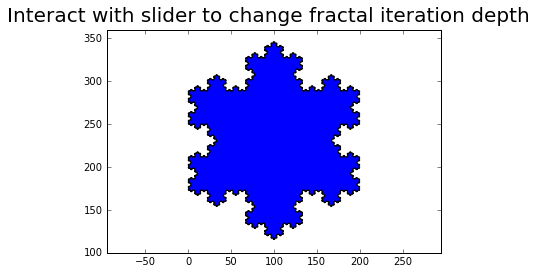

In [103]:
    # Setup our base input shape, a triangle
    base_shape = shape_setup()
    
    
    # Function of interactive widget
    def snow_interactive(depth):
        # Make a Koch snowflake
        shape = gen_snowflake(base_shape, depth)
    
        # Convert the generated snowflake into a Path object
        path = shape_helper(shape)

        # Plot the snowflake Path object
        fig = plt.figure()
        fig.suptitle('Interact with slider to change fractal iteration depth', fontsize=20)
        ax = fig.add_subplot(111)
        patch = patches.PathPatch(path, facecolor='blue', lw=1)
        ax.add_patch(patch)
        ax.set_xlim(-25, 225)
        ax.set_ylim(100, 360)
        ax.set_aspect('equal', 'datalim')
        plt.show()
    
    # Display the slider widget
    interact(snow_interactive, depth=(0,5,1))
    
